<a href="https://colab.research.google.com/github/Zncl2222/MachineLearningPractice/blob/pytorch_tutorial/pytorch_tutorial/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Tue Apr  2 11:55:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cpu' if torch.cuda.is_available() else 'cuda'
device

2.2.1+cu121


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [4]:
# Face Recognition
# Self-driving cars
# Security

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [ ]:
# Overfitting means the model can only have a good performance on the training data, but not in the other data that the model do not seen before.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
# Dropout
# Regularization
# Data augmentation

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [8]:
from torchvision import datasets
from torchvision import transforms


train_data = datasets.MNIST(
  root=".",
  train=True,
  download=True,
  transform=transforms.ToTensor()
)

test_data = datasets.MNIST(
  root=".",
  train=False,
  download=True,
  transform=transforms.ToTensor()
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

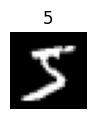

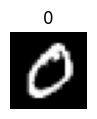

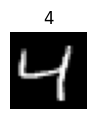

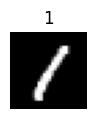

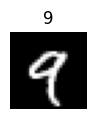

In [15]:
import matplotlib.pyplot as plt


for i in range(5):
  plt.figure(figsize=(1, 1))
  plt.imshow(train_data[i][0].squeeze(), cmap='gray')
  plt.title(train_data[i][1])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [16]:
from torch.utils.data import DataLoader


train_dataloader = DataLoader(
  dataset=train_data,
  batch_size=32,
  shuffle=True
)

test_dataloader = DataLoader(
  dataset=test_data,
  batch_size=32,
  shuffle=False
)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ca3e3cb4460>,
 <torch.utils.data.dataloader.DataLoader at 0x7ca3e3cb5b10>)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [21]:
from torch import nn


class MNISTModel(nn.Module):

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(
        in_channels=input_shape,
        out_channels=hidden_units,
        kernel_size=3,
        stride=1,
        padding=1,
      ),
      nn.ReLU(),
      nn.Conv2d(
        in_channels=hidden_units,
        out_channels=hidden_units,
        kernel_size=3,
        stride=1,
        padding=1
      ),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(
        in_channels=hidden_units,
        out_channels=hidden_units,
        kernel_size=3,
        stride=1,
        padding=1
      ),
      nn.ReLU(),
      nn.Conv2d(
        in_channels=hidden_units,
        out_channels=hidden_units,
        kernel_size=3,
        stride=1,
        padding=1
      ),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x


model = MNISTModel(input_shape=1, hidden_units=10, output_shape=10).to(device)
model

MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [25]:
import torch
from tqdm.auto import tqdm


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

epochs = 5

for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model.train()
    X, y = X.to(device), y.to(device)

    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(train_dataloader)

  test_loss_total = 0
  model.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model(X_test)
      loss = loss_fn(test_pred, y_test)
      test_loss_total += loss
    test_loss_total /= len(test_dataloader)

  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test Loss: {test_loss_total:.3f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.241 | Test Loss: 0.071
Epoch: 1 | Loss: 0.072 | Test Loss: 0.054
Epoch: 2 | Loss: 0.057 | Test Loss: 0.054
Epoch: 3 | Loss: 0.048 | Test Loss: 0.039
Epoch: 4 | Loss: 0.043 | Test Loss: 0.038


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

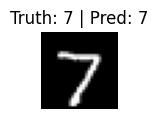

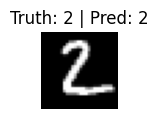

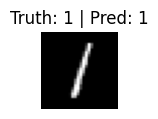

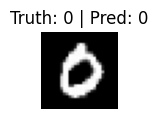

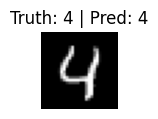

In [29]:
for i in range(5):
  img = test_data[i][0]
  label = test_data[i][1]

  model_pred_logits = model(img.unsqueeze(dim=1).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  plt.figure(figsize=(1, 1))
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [30]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [31]:
from tqdm.auto import tqdm
model.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    y_logits = torch.softmax(y_pred, dim=1)
    y_prod_labels = torch.argmax(y_logits, dim=1)
    y_preds.append(y_prod_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000

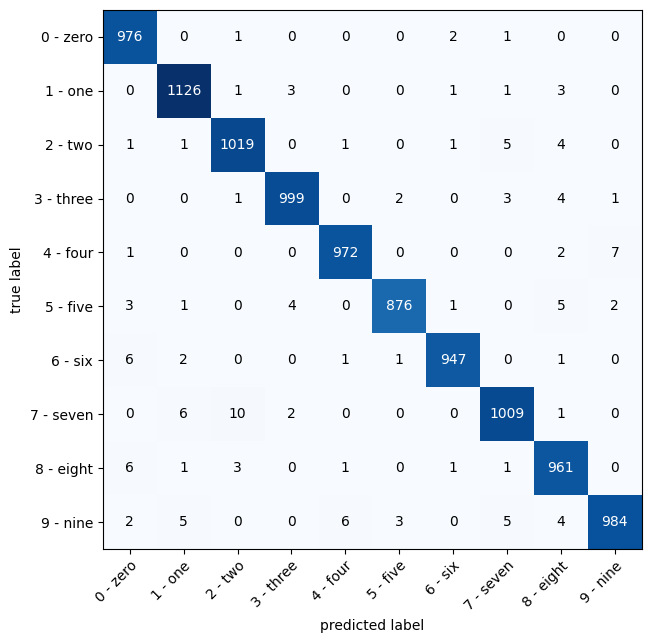

In [33]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(train_data.classes))
confmat_tensor = confmat(preds=y_preds, target=test_data.targets)

fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=train_data.classes,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [34]:
random_tensor = torch.rand([1, 3, 64, 64])

In [41]:
conv_layer = nn.Conv2d(
  in_channels=3,
  out_channels=64,
  kernel_size=3,
  stride=4,
  padding=1
)
random_tensor_through_conv_layer = conv_layer(random_tensor)
random_tensor_through_conv_layer.shape, random_tensor.shape

(torch.Size([1, 64, 16, 16]), torch.Size([1, 3, 64, 64]))

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [43]:
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(
  root='.',
  download=True,
  train=True,
  transform=transforms.ToTensor()
)

fashion_mnist_test = datasets.FashionMNIST(
  root='.',
  download=True,
  train=False,
  transform=transforms.ToTensor(),
)

len(fashion_mnist_train), len(fashion_mnist_test)

100%|██████████| 26421880/26421880 [00:01<00:00, 16042388.45it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 268339.96it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5114341.47it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16320693.12it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



(60000, 10000)

In [44]:
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(
  dataset=fashion_mnist_train,
  batch_size=32,
  shuffle=True
)

fashion_mnist_test_dataloader = DataLoader(
  dataset=fashion_mnist_test,
  batch_size=32,
  shuffle=False
)
len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)

(1875, 313)

In [45]:
model_2 = MNISTModel(
  input_shape=1,
  hidden_units=10,
  output_shape=10
).to(device)
model_2

MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [46]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [48]:
from torchmetrics import Accuracy


acc_fn = Accuracy(task="multiclass", num_classes=len(fashion_mnist_train.classes)).to(device)

epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss, test_loss = 0, 0
  train_acc, test_acc = 0, 0

  model_2.train()
  for batch, (X, y) in enumerate(fashion_mnist_train_dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model_2(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += acc_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(fashion_mnist_train_dataloader)
  train_acc /= len(fashion_mnist_train_dataloader)

  model_2.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(fashion_mnist_test_dataloader):
      y_pred_test = model_2(X_test)
      test_loss += loss_fn(y_pred_test, y_test)
      test_acc += acc_fn(y_pred_test, y_test)
    test_loss /= len(fashion_mnist_test_dataloader)
    test_acc /= len(fashion_mnist_test_dataloader)
  print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.2f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.244 | Train acc: 0.55 | Test loss: 0.038 | Test acc: 0.74
Epoch: 1 | Train loss: 0.526 | Train acc: 0.81 | Test loss: 0.038 | Test acc: 0.82
Epoch: 2 | Train loss: 0.437 | Train acc: 0.84 | Test loss: 0.038 | Test acc: 0.84
Epoch: 3 | Train loss: 0.393 | Train acc: 0.86 | Test loss: 0.038 | Test acc: 0.85
Epoch: 4 | Train loss: 0.363 | Train acc: 0.87 | Test loss: 0.038 | Test acc: 0.86


In [49]:
test_preds = []
model_2.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
    y_logits = model_2(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu()

  0%|          | 0/313 [00:00<?, ?it/s]

In [50]:
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_pred_indexes)

1361

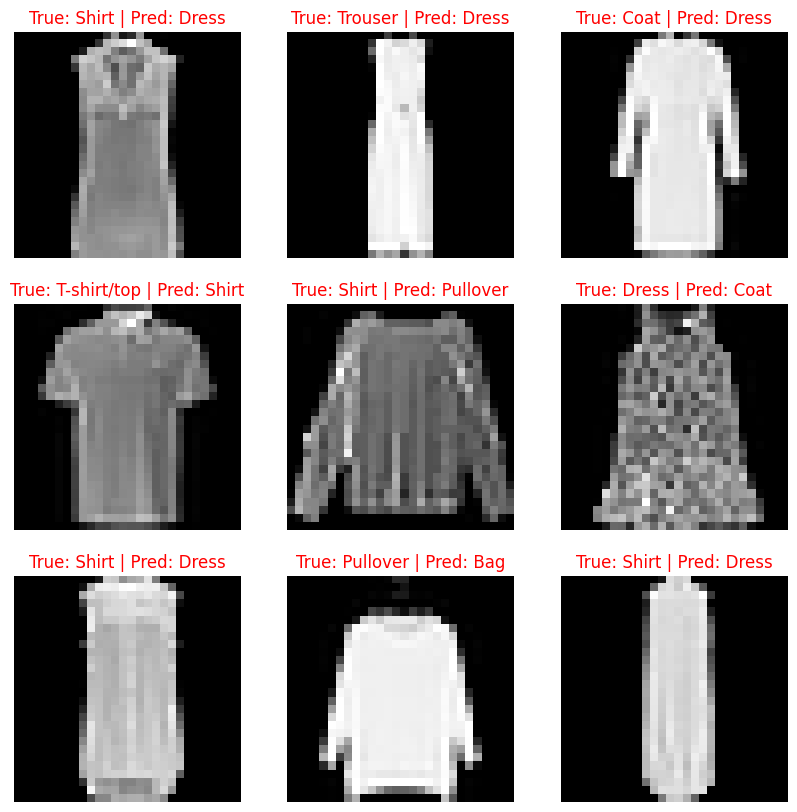

In [51]:
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  true_label = fashion_mnist_train.classes[fashion_mnist_test[idx][1]]
  pred_label = fashion_mnist_train.classes[test_preds[idx]]

  plt.subplot(3, 3, i + 1)
  plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False)
